<a href="https://colab.research.google.com/github/minurasam/CS408/blob/main/Fast_Computation_of_Optical_Flow_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fast Computation of Optical Flow**

## Implementation

In [23]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

In [24]:
# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture("/content/Traffic.mp4")

# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()

# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally
# expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)

# Creates an image filled with zero
# intensities with the same dimensions
# as the frame
mask = np.zeros_like(first_frame)

# Sets image saturation to maximum
mask[..., 1] = 255



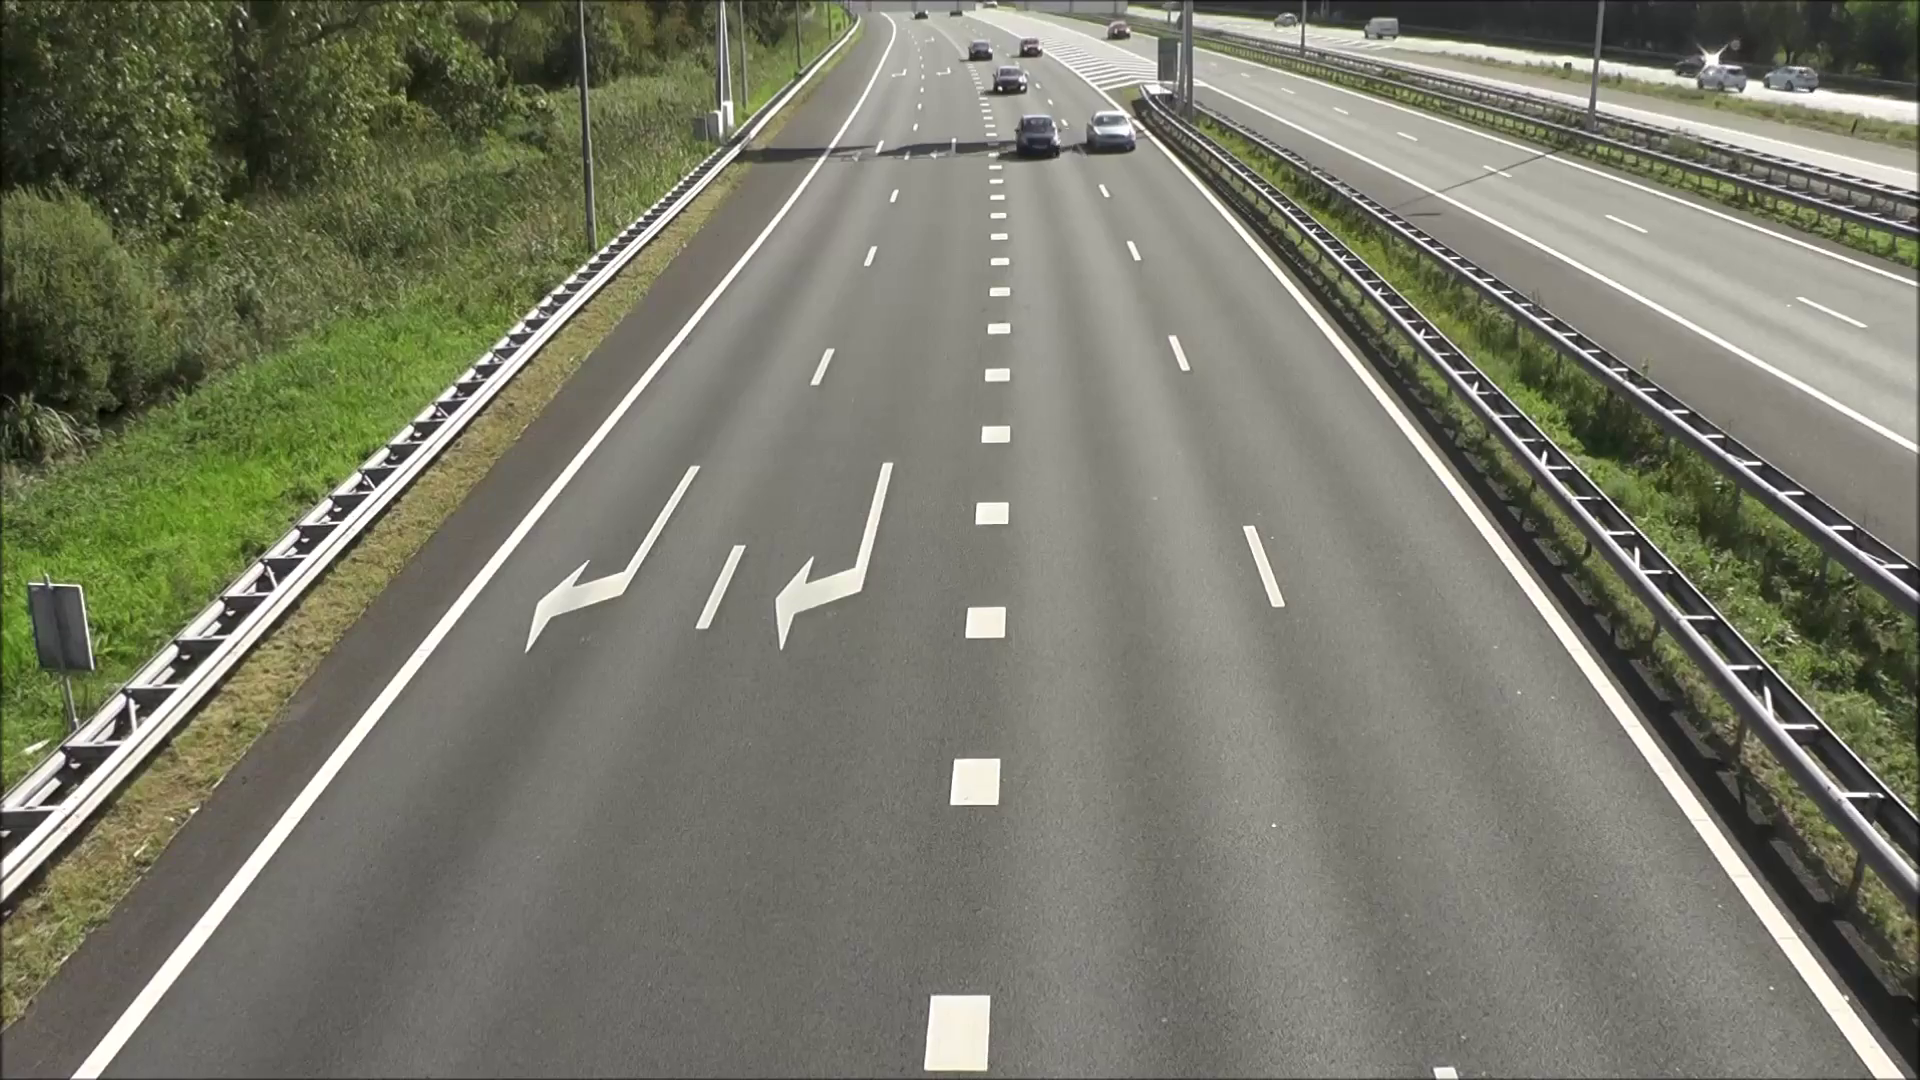

In [ ]:
while(cap.isOpened()):
	
	# ret = a boolean return value from getting
	# the frame, frame = the current frame being
	# projected in the video
	ret, frame = cap.read()
	
	# Opens a new window and displays the input
	# frame
	cv2_imshow(frame)
	
	# Converts each frame to grayscale - we previously
	# only converted the first frame to grayscale
	gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
	
	# Calculates dense optical flow by Farneback method
	flow = cv.calcOpticalFlowFarneback(prev_gray, gray,
									None,
									0.5, 3, 15, 3, 5, 1.2, 0)
	
	# Computes the magnitude and angle of the 2D vectors
	magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
	
	# Sets image hue according to the optical flow
	# direction
	mask[..., 0] = angle * 180 / np.pi / 2
	
	# Sets image value according to the optical flow
	# magnitude (normalized)
	mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
	
	# Converts HSV to RGB (BGR) color representation
	rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
	
	# Opens a new window and displays the output frame
	cv2_imshow(rgb)
	
	# Updates previous frame
	prev_gray = gray
	
	# Frames are read by intervals of 1 millisecond. The
	# programs breaks out of the while loop when the
	# user presses the 'q' key
	if cv.waitKey(1) & 0xFF == ord('q'):
		break

# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()
